CP 321 Final Project

By: Aryan Amin (193265300) and Nicolas Lozano (150701040)

This is our project for the CP 321 final assignment. We are working on the dataset that is providing the information about the key infrastructure projects that is either completed or that are currenlty in progress in the state of Ontario. The dataset is taken from the website of government of Canada. The website link is https://search.open.canada.ca/en/od/?sort=score%20desc&page=1&search_text=key%20infrastructure&od-search-format=CSV. We followed the ASSERT model that we learned in our course to complete this project.

The question we are trying to answer is

1) How many projects is the governement of Ontario building in different areas and what is the status of that projects?

2) What region is given the maximum amount of budget part?

3) Which are top 10 most expensive projects in the state of Ontario?

Part 1: Dataset Description and processing

The dataset is in the csv format. The dataset has all the information regarding the key infrastructure projects that are build in the state of Ontario. We cleaned the dataset because there were some unnecessary columns such as the funding columns. After cleaning up the dataset we have some more useful columns such as the Category: Describes the category of the projects, Status: This describes that if the project is completed or not, Target Completion Date: Gives the date that the project should be completed by, Description: Description of the project, Estimated Total Budget: Gives the total budget that is spent for the project to be completed.

The community, area and region series describe that which community is helped with the project and the area and region that particular community is located in.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dti

df = pd.read_csv("data/ontbuilds-all-20210311.csv")
df

,Category,Supporting Ministry,Community,Project,Status,Target Completion Date,Description,Result,Area,Region,Estimated Total Budget,Website,Latitude,Longitude,Geometry
0,Broadband,"Agriculture, Food and Rural Affairs",Bracebridge,High Speed Internet Expansion,Complete,Sep-19,Installation of fibre-optic cable infrastructu...,Improved connectivity speeds for local residen...,Muskoka,Central,"$5,716,398",NaN,45.045124,-79.301096,NaN
1,Broadband,"Agriculture, Food and Rural Affairs",Brant County,High Speed Internet Expansion,Planning,Jun-23,Installing fibre-optic cable infrastructure,Increased service speeds and availability of p...,Brant,Southwest,0,NaN,NaN,NaN,NaN
2,Broadband,"Agriculture, Food and Rural Affairs",Brantford,High Speed Internet Expansion,Planning,Jul-21,Installing fibre-optic cable infrastructure,Increased service speeds and availability of p...,Brant,Southwest,0,NaN,NaN,NaN,NaN
3,Broadband,"Agriculture, Food and Rural Affairs",Bruce County,High Speed Internet Expansion,Planning,Jun-23,Installing fibre-optic cable infrastructure,Increased service speeds and availability of p...,Bruce,Southwest,0,NaN,NaN,NaN,NaN
4,Broadband,"Agriculture, Food and Rural Affairs",Caledon,High Speed Internet Expansion,Planning,Jun-23,Installing fibre-optic cable infrastructure,Increased service speeds and availability of p...,Peel,Central,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,Transit,Transportation,Windsor,Implementation of the Windsor Transit Master P...,Planning,Dec-22,A design study to evaluate the costs of improv...,Improved public transit system.,Essex,Southwest,"$3,876,437",NaN,NaN,NaN,NaN
4213,Transit,Transportation,Woodstock,Transit Service Expansion,Planning,Dec-23,"Purchase new diesel buses, new signage of bus ...",Improved public transit to unserved residentia...,Oxford,Southwest,"$3,137,500",NaN,43.13,-80.732,NaN
4214,Transit,Transportation,Woodstock,Bus Wash Building,Planning,Dec-23,Construction of an automatic bus washing build...,"Improved quality of service, extended bus life...",Oxford,Southwest,"$1,625,000",NaN,43.13008,-80.756397,NaN
4215,Transit,Transportation,York,York VIVA Bus Rapid Transit,Under construction,2020,Construction of dedicated rapidways along the ...,Making it easier and faster to travel in and a...,York,Central,"$1,400,000,000",http://www.infrastructureontario.ca/York-Viva-...,NaN,NaN,NaN


Part 2: Visualization of the dataset

In this part of the visualization we see the status of the project according to the category of the project

First Visualization (Aryan Amin): Gives a description of how many projects are completed, how many are under construction and how many projects are under planning for certain categories.

Second Visualization (Aryan Amin): Gives a description of how much money is spent for that region.

Third Visualization (Nicolas Lozano): Gives a description using a map and showing that where is the money used in the state of Ontario

Fourth Visualization (Nicolas Lozano): Gives a description about the top 10 most expensive projects that are build in the state of Ontario

<AxesSubplot:ylabel='Types of Projects'>

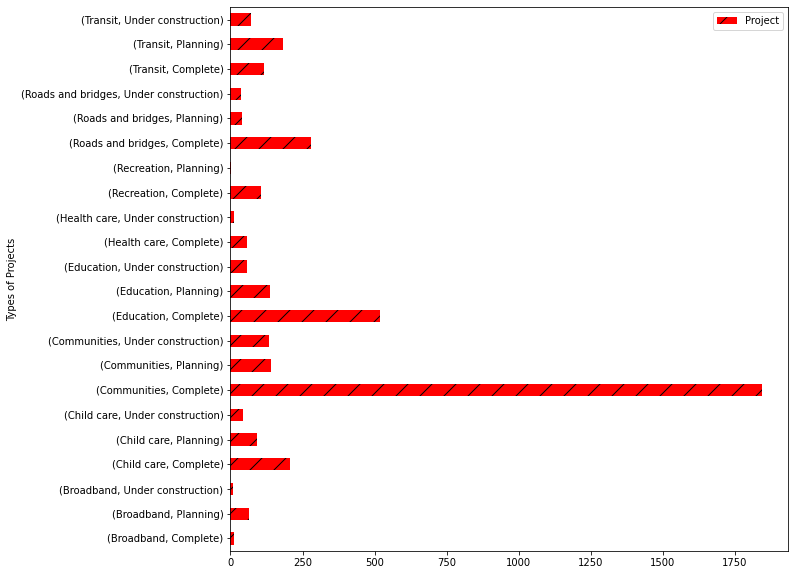

In [15]:
df_1 = df.groupby(['Category', 'Status']).count()           #Counting the projects according to their category and status
pos = list(range(len(df['Category'])))                      #
width = 0.4

df_2 = df_1.iloc[1:, 2]                                     #Selecting only the columns of category and status
df_2.plot(kind = "barh", figsize = (10,10), color = "red", xlabel = "Types of Projects", ylabel = "Number of Projects", hatch = "/", legend = True)
#Plotting the graph, Horizontal bars


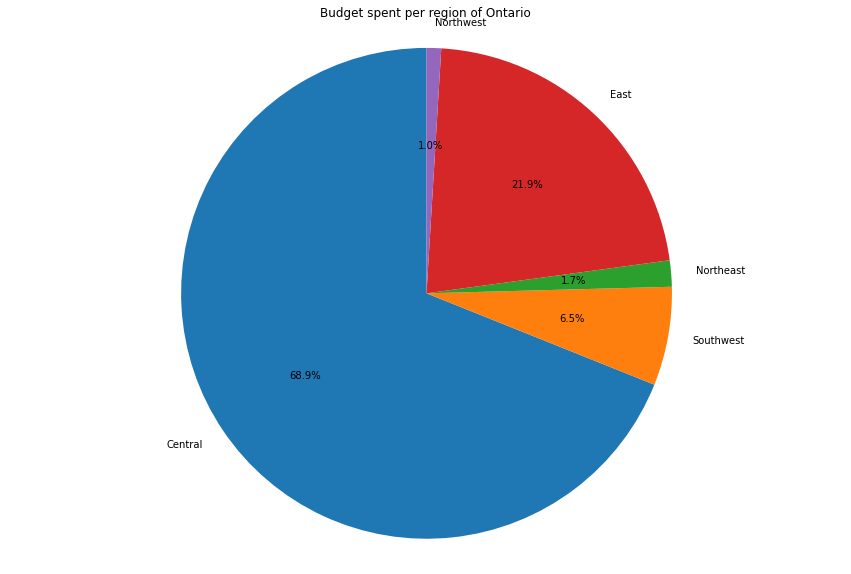

In [45]:
from csv import reader

filename = 'data/ontbuilds-all-20210311.csv'

regions = []
budgets = []

with open(filename, 'r', encoding='utf-8') as file_1:
    csv_reader_1 = reader(file_1)
    for row in csv_reader_1:
        if (row[9] != "Region" and row[9] != "TBD" and row[9] not in regions):
            regions.append(row[9])

for region in regions:
    with open(filename, 'r', encoding='utf-8') as file:
        csv_reader = reader(file)
        budget = 0
        for row in csv_reader:
            if row[9] == region:
                cost = ''
                for character in row[10]:
                    if character != '$' and character != ',':
                        cost += character
                cost = float(cost)
                budget += cost
        budgets.append(budget)

fig, ax = plt.subplots(figsize = (15,10))
ax.pie(budgets, labels = regions, autopct = '%1.1f%%', startangle = 90)
ax.axis('equal')
plt.title("Budget spent per region of Ontario")
plt.show()


In [ ]:
import geopandas as gpd
from geopandas import GeoDataFrame
import pandas as pd
import matplotlib.pyplot as plt
from csv import reader
from shapely.geometry import Point

filename = 'data/ontbuilds-all-20210311.csv'
shape_file = 'lpr_000b16a_e/lpr_000b16a_e.shp'

data = []
mark_IDs = []
latitudes = []
longitudes = []

index = 0
with open(filename, 'r', encoding='utf-8') as file:                                      # Loop to clean unwanted columns
    csv_reader = reader(file)
    for row in csv_reader:
        row_data = []
        if row[12] != 'Latitude':                                                        # Ignores title row
            if (row[12] != '' and row[13] != '') and ('|' not in (row[12] or row[13])):  # Ignores wrongly-formatted coordinates
                mark_IDs.append(index)
                latitudes.append(float(row[12]))
                longitudes.append(float(row[13]))
                row_data.append(index)
                row_data.append(float(row[12]))
                row_data.append(float(row[13]))
                data.append(row_data)
                index += 1

index = 0
geometry_array = []
for item in mark_IDs:
    geo_item = Point(longitudes[index], latitudes[index])
    geometry_array.append(geo_item)

df = pd.DataFrame({'ID':mark_IDs, 'Longitude':longitudes, 'Latitude':latitudes})
gdf = gpd.GeoDataFrame(df, geometry = geometry_array)



world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
# #cities.plot()
# #ontario.plot()


fig,ax=plt.subplots(figsize=(12,10))
world[world.name == 'Canada'].plot(ax=ax, color='white',edgecolor = 'black')
gdf.plot(ax=ax, marker='.', color='red')
plt.show()

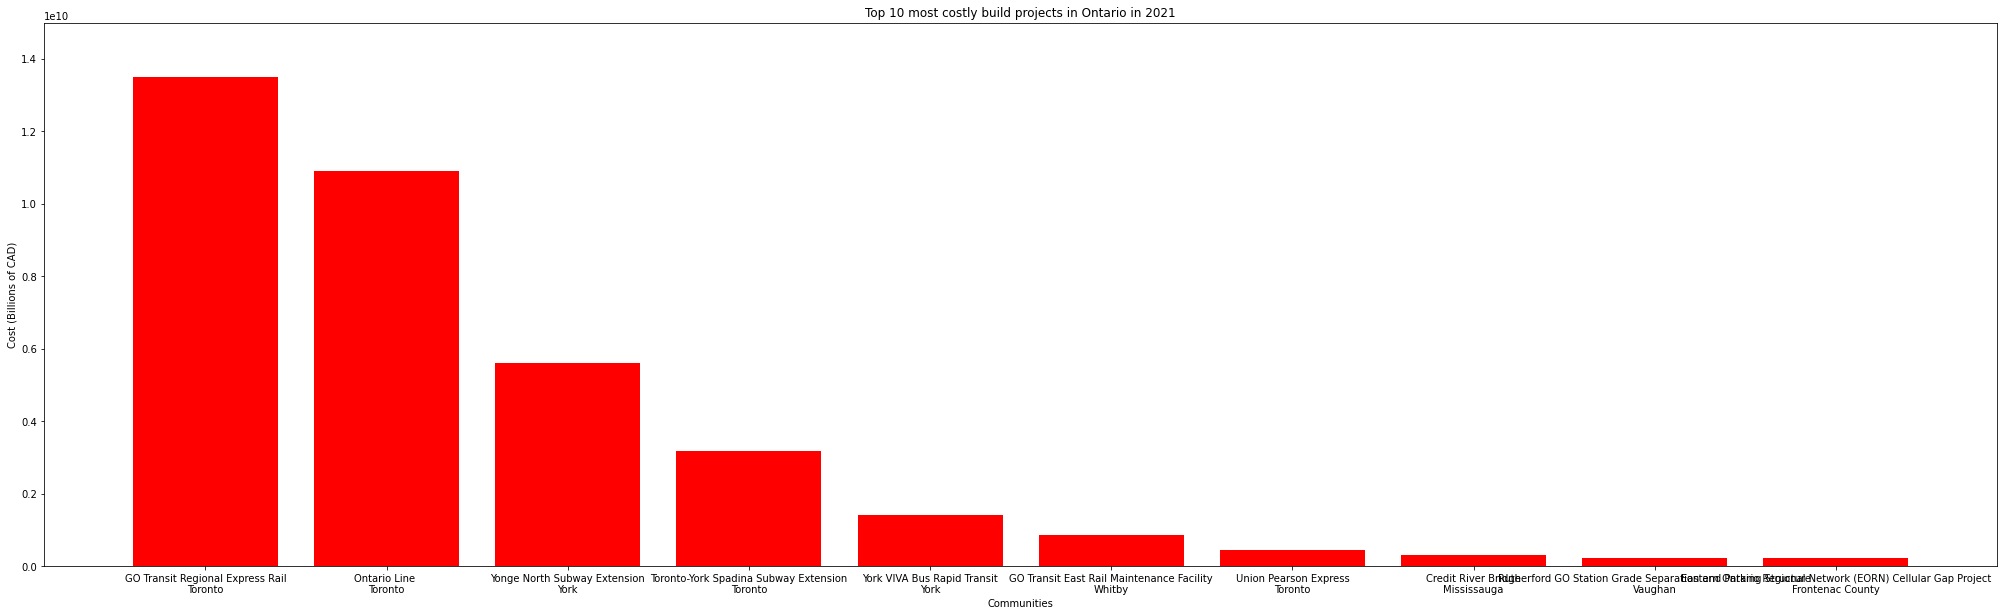

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from csv import reader

filename = 'data/ontbuilds-all-20210311.csv'
shape_file = 'lpr_000b16a_e/lpr_000b16a_e.shp'

data = []
project_names = []
costs = []
top10 = []
top_costs = []
top_communities = []

for i in range(10):
    top10.append(['', 0])

with open(filename, 'r', encoding='utf-8') as file:                                      # Loop to clean unwanted columns
    csv_reader = reader(file)
    for row in csv_reader:
        row_data = []
        if row[2] != 'Community':                                                        # Ignores title row
            cost = ''
            for character in row[10]:
                if character != '$' and character != ',':
                    cost += character
            cost = float(cost)
            project_name = row[3] + '\n' + row[2]
            row_data.append(project_name)
            row_data.append(cost)

            index = 0
            for item in top10:
                if item[1] < cost:
                    top10.pop(index)
                    top10.insert(index, row_data)
                    break
                index += 1
                
for item in top10:
    top_communities.append(item[0])
    top_costs.append(item[1])

# Creating bar chart
fig = plt.figure(figsize = (35, 10))
axes = plt.gca()
axes.set_ylim([0, 15000000000])
plt.bar(top_communities, top_costs, color ='red',  width = 0.8) 
plt.xlabel('Communities') 
plt.ylabel('Cost (Billions of CAD)') 
plt.title('Top 10 most costly build projects in Ontario in 2021') 
plt.show() 

Conclusion:

From the dataset processing and analyzing all the information we processed the data in four visualization and found out that most of the projects that are completed are related with comunities. Most of the budget is spent for the central region of the Ontario state. Then from the fourth visualization we found out that the most expensive project for the Ontario state was the GO Transit Regional Express Rail for the city of Toronto. Finally we related all of the visualizations by plotting the map of Ontario on visualization 3 and describing the amount of projects that were made around the state of Ontario.
